# <center> Introduction to NetworkX</center>

In [2]:
from matplotlib import pyplot as plt
import networkx as nx

Before we begin, we must first have a set of relationships that we wish to graph. Let's use a simple toy example, such as the five relationships below. Each person in these relationships will function as a single node in our graph. We will want to map these relationships by drawing edges between each individual's node.

In [47]:
rels = [
    
    ["Fred", "George"],
    ["Harry", "Rita"],
    ["Fred", "Ginny"],
    ["Tom", "Ginny"],
    ["Harry", "Ginny"]
    
]

In order to begin working with this data in NetworkX, we need to first populate a NetworkX `Graph` class. It is Pythonic to call this variable `G`.

In [38]:
G = nx.Graph()

Once created, we can populate the graph with relationships in a loop. We will want to use the `.add_edge()` method from the `Graph` class. This will take two mandatory arguments: 1) the source node and 2) the destination node. The source and the destination are important in certain circumstances when force is applied in a graph. This controls how the map is displayed visually.

In [48]:
for rel in rels:
    source, dest = rel
    G.add_edge(source, dest)

With all our edges add into the Graph, we can now plot it with Matplotlib. We will use the `draw_networkx()` function to create a plot in memory. This will take one argument, the graph of nodes we wish to visualize. Next, we will use `plt.show()` to display the map. Since we are working within a Jupyter Notebook, this will be displayed as an output.

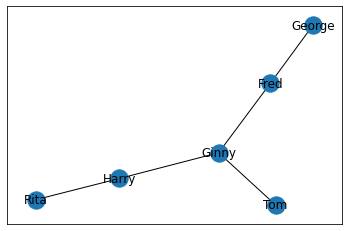

In [50]:
nx.draw_networkx(G)
plt.show()

## Adding all Edges at Once

Sometimes, you will not want to add each edge individually. In these circumstances, we can leverage the `add_edges_from()` method to add a list of edges all at once. This method will expect a list of relationships.

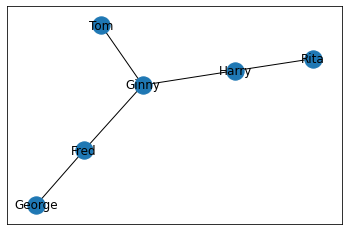

In [56]:
G = nx.Graph()
G.add_edges_from(rels)
nx.draw_networkx(G)
plt.show()

## Limitations of NetworkX

While NetworkX is quite useful for producing quick and (with practice) quality graphs, it is largely suited to smaller networks. Often, when we are working with larger datasets of networks it will be important to visualize those networks more dynamically, where users can zoom in, zoom out, and select certain nodes. Most of these types of graphs are designed and implemented in JavaScript.

The graphs designed in JavaScript have the advantage of being able to be opened in any browser and distributed across the web or embedded in any website. Fortunately, the Python library PyVis allows us to produce JavaScript-based graphs with Python code.